In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pandas import *


Image de référence

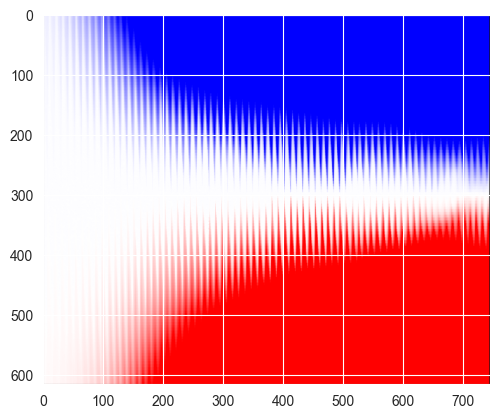

In [93]:
myimage_crop=Image.open('crop_ref.png')
image_crop = np.array(myimage_crop)
plt.imshow(image_crop)

In [94]:
graduation_crop=Image.open('crop_ref_taille_graduation.png')
graduation_image_crop = np.array(graduation_crop)
graduation=graduation_image_crop.shape[1]

In [95]:
longueur=image_crop.shape[0]
largeur=image_crop.shape[1]
npixel=longueur*largeur

Image à recadrer

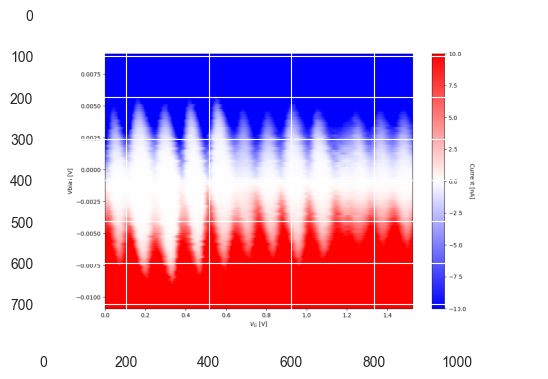

In [129]:
myimg=Image.open('Stage_analyse_image/plot/good/sample-1S12_1_die-19-14_measurement-coulomb_diamond_zoom_exp_2.png')
#myimg=Image.open('Stage_analyse_image/plot/good/D_.png')
#myimg.show()
plt.imshow(myimg)
plt.show()

In [130]:
img = np.array(myimg)
img.shape

(800, 1200, 4)

Rechercher la premère case pas blanche dans la première moitié verticale

In [131]:
for index, x in np.ndenumerate(img):    
    if x!=255:
        ind_debut=(index[0],index[1])
        if ind_debut[1]<=img.shape[1]/2:
            break
ind_debut

(95, 149)

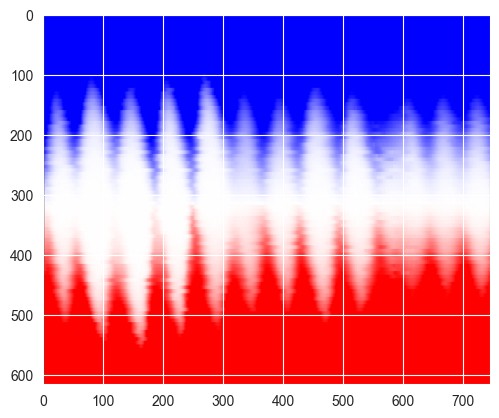

In [133]:
mil=graduation//2
if img[ind_debut[0]][ind_debut[1]+mil][0]==255 and img[ind_debut[0]][ind_debut[1]+mil][1]==255 and img[ind_debut[0]][ind_debut[1]+mil][2]==255 and img[ind_debut[0]][ind_debut[1]+mil][3]==255:
    image_crop2=img[ind_debut[0]:ind_debut[0]+longueur,ind_debut[1]+graduation:ind_debut[1]+largeur+graduation]
    plt.imshow(image_crop2)
else:
    image_crop2=img[ind_debut[0]:ind_debut[0]+longueur,ind_debut[1]:ind_debut[1]+largeur]
    plt.imshow(image_crop2)

Toutes les graduations ne sont pas au meme endroit donc le premier pixel pas blanc va être soit sur le graphe, soit sur la graduation de l'axe donc il y a besoin de 2 cas différents pour croper l'image. 